<a href="https://colab.research.google.com/github/pedroohsilva/analise-risco-de-credito/blob/main/analise_risco_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de Risco de Crédito:

Este projeto tem como objetivo principal desenvolver um modelo para análise e previsão de risco de crédito, identificando clientes com maior probabilidade de inadimplência com base em dados históricos e características financeiras.



**Fonte dos dados (adaptado)** https://www.kaggle.com/datasets/laotse/credit-risk-dataset

| Nome da Variável               | Descrição                                                      |
|:-------------------------------|:---------------------------------------------------------------|
| `person_age`                   | Idade da pessoa                                                |
| `person_income`                | Renda anual da pessoa                                          |
| `person_home_ownership`        | Tipo de propriedade da residência                              |
| `person_emp_length`            | Tempo de emprego (em anos)                                     |
| `loan_intent`                  | Objetivo do empréstimo                                         |
| `loan_grade`                   | Classificação do empréstimo                                    |
| `loan_amnt`                    | Valor do empréstimo                                            |
| `loan_int_rate`                | Taxa de juros do empréstimo                                    |
| `loan_status`                  | Status do empréstimo (0: não inadimplente; 1: inadimplente)|
| `loan_percent_income`          | Percentual da renda comprometido com o empréstimo              |
| `cb_person_default_on_file`    | Histórico de inadimplência registrado                          |
| `cb_preson_cred_hist_length`   | Tempo de histórico de crédito (em anos)                        |

### Importação de Bibliotecas

In [1]:
import pandas as pd # Análise e Manipulação de Dados
import numpy as np # Operações matemáticas
import seaborn as sns # visualização de dados estatísticos
import matplotlib.pyplot as plt # visualização de dados
import plotly.express as px # visualização de dados com gráficos dinâmicos

## Análise Exploratória

In [8]:
# Carregando dataframe
base_credit = pd.read_csv('credit_data.csv')

#### Descrição Geral
Ao analisar a visão geral do conjunto de dados, é possível identificar que temos os seguinte tipos de variáveis:

* **clientid (id do cliente)** - Categórica Nominal
* **income (renda do cliente)** - Numérica Contínua
* **age (idade do cliente)** - Numérica Discreta
* **loan (dívida do cliente)** - Numérica Contínua
* **default (Inadimplência do cliente)** - Numérica Discreta
  * **0 - Pagou**
  * **1 - Não pagou**

In [6]:
# Forma dos dados
forma = base_credit.shape
print(f'O conjunto de dados possui {forma[0]} linhas e {forma[1]} colunas.')

O conjunto de dados possui 2000 linhas e 5 colunas.


In [ ]:
# Visão geral do dataframe
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### Estatísticas dos Dados
A importância da estatística na Análise Exploratória de Dados reside na sua capacidade de fornecer ferramentas para descrever, analisar e interpretar os dados, permitindo a identificação de padrões, relações e tendências que seriam difíceis de reconhecer apenas através de uma visualização superficial.

**Insights preliminares:**

* **Idades atípicas:** Ao analisar os valores mínimos, máximos, é possível identificar valores outliers no campo de **idade** que podem afetar a precisão dos modelos.
* **Distribuição Assimétrica de Dívidas:** Analisando a diferença entre a média e mediana no campo **loan**, vemos uma diferença considerável entre essas duas medidas. O **CV** (coeficiente de variação) - produto da divisão entre o desvio padrão e a média multiplicado por 100 - é igual a **68.52%**, caraterizando um desvio considerável em relação ao padrão dos dados.

**Implicação:** Pode indicar que alguns clientes possuem dívidas muito acima da média, que a depender da renda anual pode ser um fator de risco para inadimplência ou oportunidades de negócio.

In [ ]:
# Estatísticas dos dados
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [60]:
# Coeficiênte de Variação
cv = (base_credit['loan'].std() / base_credit['loan'].mean()) * 100
print(f'O coeficiente de variação é {cv:.2f}%.')

O coeficiente de variação é 68.52%.


#### Frequência Relativa de Inadimplência

In [68]:
# Contagens
default_count = base_credit['default'].count()
payed = base_credit[base_credit['default'] == 0].shape[0]
no_payed = base_credit[base_credit['default'] == 1].shape[0]

# Analisando a Freqência Relativa dos Dados
default_relative_frequency = no_payed / default_count * 100
payed_relative_frequency = payed / default_count * 100
no_payed_relative_frequency = round(no_payed / default_count * 100)

# Imprimindo resultados
print(f'Os dados de {default_count} indivíduos foram analisados. Desses, {payed} cumpriram corretamente com as obrigações financeiras e apenas {no_payed} se encontram em estado de inadimplência, número que representa {no_payed_relative_frequency}% do total.')

Os dados de 2000 indivíduos foram analisados. Desses, 1717 cumpriram corretamente com as obrigações financeiras e apenas 283 se encontram em estado de inadimplência, número que representa 14% do total.


#### Faixa de Valores de Dívida
Ao analisar a faixa de valores das dívidas, observa-se que os valores variam entre 1.38 e 13766.05.

In [63]:
min_loan = base_credit['loan'].min()
max_loan = base_credit['loan'].max()

print(f'Ao analisar a faixa de valores das dívidas, observa-se que os valores variam entre {min_loan:.2f} e {max_loan:.2f}.')

Ao analisar a faixa de valores das dívidas, observa-se que os valores variam entre 1.38 e 13766.05.


In [23]:
# Visualizando cliente com a maior Dívida
base_credit[base_credit['loan'] >= 13766.051239	]

,clientid,income,age,loan,default
1378,1379,69755.320163,44.543682,13766.051239,0


In [21]:
# Visualizando cliente com a menor Dívida
base_credit[base_credit['loan'] <= 1.3777630]

,clientid,income,age,loan,default
865,866,28072.604355,54.142548,1.37763,0


#### Valores Nulos

Interpretando as informações de registros nulos abaixo, confirmamos que há 3 idades inconsistentes nos índices 12, 21 e 26; problema que será resolvido porteriormente na etapa de tratamento dos dados.

In [ ]:
# Verificando idades inconistentes
base_credit[base_credit['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# Informações de registros nulos
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


### Visualizações

#### Contagem do Status de Inadimplência

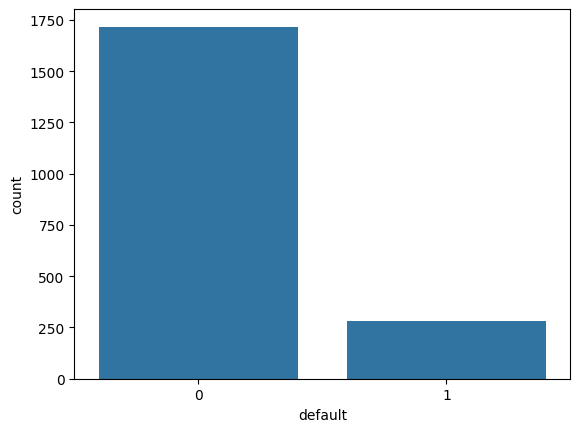

In [52]:
# Visualizando contagem do status de inadimplência
sns.countplot(x=base_credit['default']);

#### Distribuição de Idades

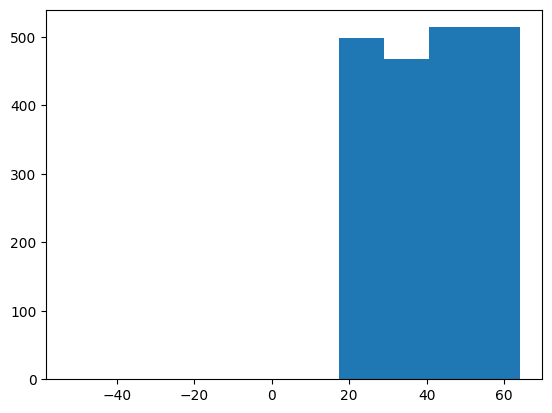

In [37]:
# Distribuição de Idades
plt.hist(x=base_credit['age']);

#### Estatísticas de Renda

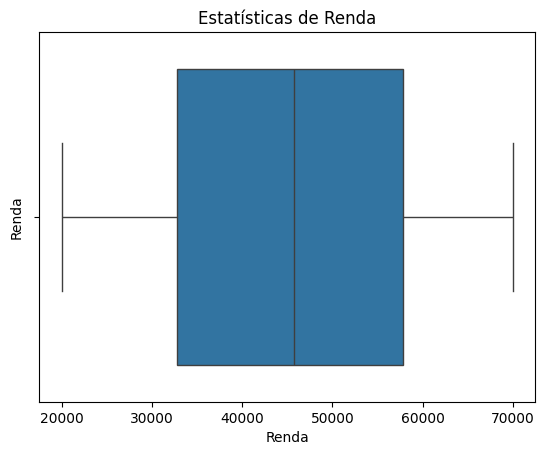

In [67]:
# Visualizando Box plot de Renda
sns.boxplot(data=base_credit, x='income');
plt.xlabel('Renda');
plt.ylabel('Renda');
plt.title('Estatísticas de Renda');

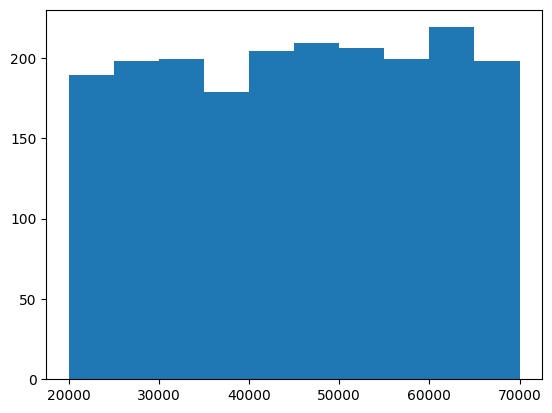

In [ ]:
# Visualizando Distribuição de Renda
plt.hist(x=base_credit['income']);

#### Distribuição de Dívidas

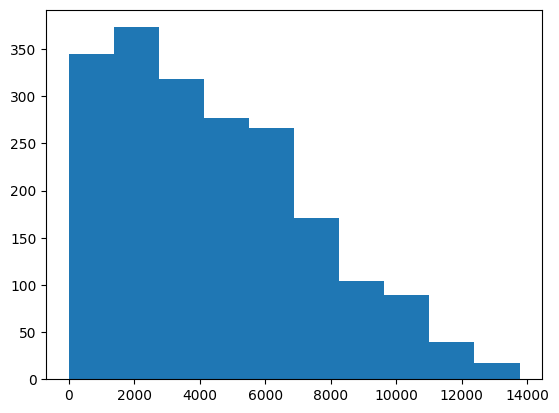

In [ ]:
# Visualizando Distribuição de Dívidas
plt.hist(x=base_credit['loan']);

#### Gráfico Dispersão Dinâmico de Dívidas por Idades
De acordo com os dados, indivíduos com idade inferior a 35 anos representam a maior parte dos devedores, apresentando uma tendência mais acentuada à inadimplência.

In [69]:
# Gráfico Dinâmico da Dispersão de Dívidas por Idades
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'loan'], color='default')
grafico.show()

## Pré-Processamento de Dados

### Tratamento de Dados:

**Dados Inconsistentes:**

In [ ]:
# Filtrando idades inconsistentes pelo índice
df[df['age'] < 0].index

Index([15, 21, 26], dtype='int64')

In [ ]:
# Média de idades com registros de idade inconsistentes
idade_media_antes = df['age'].mean()
idade_media_antes

np.float64(40.80755937840458)

In [ ]:
# Média de idades sem registros de idade inconsistentes
idade_media = df['age'][df['age'] > 0].mean()
idade_media

np.float64(40.92770044906149)

Ao analisar a diferença entre a média de idade entre as duas situações, optei por não exluir os registros incongruentes, mas sim substituir pela média de idades.

In [ ]:
# Calcula a média apenas das idades não negativas
idade_media = df.loc[df['age'] >= 0, 'age'].mean()

# Substitui as idades menores que zero pela média calculada
df.loc[df['age'] < 0, 'age'] = idade_media

In [ ]:
# Verificando alterações
df.loc[df['age'] < 0]

,clientid,income,age,loan,default


**Valores faltantes:**

In [ ]:
# Soma dos registros nulos
df.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
# Verificando informações dos registros nulos
df.loc[pd.isnull(df['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
# Substituindo registros nulos pela média de idade
df['age'].fillna(df['age'].mean(), inplace = True);

<ipython-input-21-fbd44460dcd6>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
# Verificando resultados
df.loc[(df['clientid'] == 29) | (df['clientid'] == 31) | (df['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


### Divisão entre os Previsores e Classe:

In [ ]:
# Definindo as variáveis previsoras e as três primeiras colunas
x_credit = df.iloc[:, 1:4].values

In [ ]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
type(x_credit)

numpy.ndarray

In [ ]:
# Definindo classe que armazena as classificações
y_credit = df.iloc[:, 4].values

In [ ]:
y_credit

array([0, 0, 0, ..., 1, 0, 0])

### Escalonamento de Atributos

**Escala dos valores:**

In [ ]:
# Analisando os valores mínimo
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(np.float64(20014.4894700497),
 np.float64(18.055188510566897),
 np.float64(1.37762959325451))

In [ ]:
# Analisando os valores máximos
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(np.float64(69995.6855783239),
 np.float64(63.971795841120205),
 np.float64(13766.0512393337))

**Padronização dos dados:**

In [ ]:
# Padronização dos dados
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [ ]:
# Avaliando resultados
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(np.float64(-1.7676158019964077),
 np.float64(-1.7264154144794286),
 np.float64(-1.4592791099462408))

In [ ]:
# Avaliando resultados
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(np.float64(1.7220222385319197),
 np.float64(1.739366520151568),
 np.float64(3.0616609141708273))

In [ ]:
# Avaliando resultados
x_credit

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

### Divisão dos Conjuntos de Dados (treinamento e teste):

In [ ]:
# Importação de pacotes para divisão das bases
from sklearn.model_selection import train_test_split

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
# X_credit são as variáveis preditoras (atributos), enquanto y_credit são as classes (rótulos)

X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(
    x_credit,  # Atributos (variáveis independentes) dos dados
    y_credit,  # Rótulos (variável dependente) dos dados
    test_size=0.25,  # 25% dos dados serão usados para o conjunto de teste, o restante será para treinamento
    random_state=0  # Garante que a divisão dos dados seja reproduzível (mesma divisão toda vez que rodar o código)
)

#### Bases de Treinamento:
Esses dois conjuntos representam as variáveis independentes (X) e dependentes (y) para o treinamento do modelo.

In [ ]:
print(X_credit_train.shape, # Retorna as dimensões do conjunto de dados de atributos de treinamento
      y_credit_train.shape # Retorna as dimensões do conjunto de dados de rótulos de treinamento
      )

(1500, 3) (1500,)


#### Bases de Teste:
Esses dois conjuntos serão usados para avaliar a performance do modelo após o treinamento.

In [ ]:
print(X_credit_test.shape, # Retorna as dimensões do conjunto de dados de atributos de teste
      y_credit_test.shape # Retorna as dimensões do conjunto de dados de rótulos de teste
      )

(500, 3) (500,)


### Salvando as Bases de Dados:
O comando import pickle é usado para importar o módulo pickle em Python, que fornece funcionalidades para serializar e desserializar objetos Python. A serialização (também conhecida como "pickling") transforma um objeto Python em um formato binário que pode ser armazenado em um arquivo ou enviado pela rede. A desserialização (ou "unpickling") reconverte o formato binário de volta para um objeto Python.

In [ ]:
import pickle

In [ ]:
# Abrindo o arquivo 'credit.pkl' no modo de escrita binária ('wb')
# O arquivo será criado se não existir, ou será sobrescrito se já existir
with open('credit.pkl', mode='wb') as file:
    # Utilizando pickle.dump para salvar os dados em formato binário
    # O objetivo é salvar os conjuntos de treinamento e teste (atributos e rótulos)
    # O primeiro argumento de pickle.dump é o objeto a ser serializado (no caso, a lista com os dados)
    # O segundo argumento é o arquivo onde os dados serão armazenados (a variável 'file')
    pickle.dump([X_credit_train, y_credit_train, X_credit_test, y_credit_test], file)

## Naive Bayes:
O algoritmo Naive Bayes é um método de classificação probabilístico baseado no teorema de Bayes, que utiliza a probabilidade condicional para prever classes. É amplamente utilizado devido à sua simplicidade, eficiência computacional e bons resultados, especialmente com grandes volumes de dados.

In [ ]:
# Carregando os atributos previsores
base_risco_credito = pd.read_csv('risco_credito.csv')

In [ ]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [ ]:
# Declarando variável com os atributos previsores
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [ ]:
# Declarando variável com as classes
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

### LabelEncoder:
O LabelEncoder é uma técnica utilizada em Machine Learning para transformar variáveis categóricas (texto ou dados nominais) em valores numéricos, facilitando o uso desses dados por algoritmos que exigem inputs numéricos.

In [ ]:
# Importação de pacotes necessários para o LabelEncoder
from sklearn.preprocessing import  LabelEncoder

In [ ]:
# Instanciando o objeto de tranformação de dados para cada um dos atributos categóricos
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [ ]:
# Realizando transformações
X_risco_credito[:, 0] = label_encoder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_encoder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_encoder_garantia.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_encoder_renda.fit_transform(X_risco_credito[:, 3])

In [ ]:
# Visualizando resultados
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [ ]:
import pickle

# Salvando arquivo
with open('risco_credito.pkl', mode='wb') as file:
  pickle.dump([X_risco_credito, y_risco_credito], file)

### Desenvolvimento do Modelo:

In [ ]:
# Importa o classificador Naive Bayes Gaussiano, adequado para dados contínuos (numéricos)
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Cria uma instância do classificador Naive Bayes Gaussiano para análise de risco de crédito
naive_bayes_risco_credito = GaussianNB()

# Treina o classificador Naive Bayes com os dados históricos (X) e os resultados conhecidos (y) do risco de crédito
naive_bayes_risco_credito.fit(X_risco_credito, y_risco_credito)

GaussianNB()

O método .fit() realiza o treinamento do modelo, aprendendo padrões nos dados históricos para posteriormente classificar novos clientes quanto ao risco de inadimplência.

In [ ]:
# Realizando previsão do risco de crédito para dois novos clientes com características fornecidas
previsao = naive_bayes_risco_credito.predict([[0, 0, 1, 2], [3, 0, 0, 0]])

# Exibindo os resultados das previsões feitas pelo modelo de classificação
print(f"O primeiro cliente possui risco de crédito de {previsao[0]}. O segundo cliente, {previsao[1]}.")

O primeiro cliente possui risco de crédito de baixo. O segundo cliente, moderado.


In [ ]:
# Visualizando as classes
naive_bayes_risco_credito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [ ]:
naive_bayes_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

In [ ]:
# Analisando tabela com as probabilidades prévias das classes aprendidas pelo modelo Naive Bayes durante o treinamento

tabela_prior = pd.DataFrame({
    'Classe': naive_bayes_risco_credito.classes_,
    'Probabilidade Prévia': naive_bayes_risco_credito.class_prior_
})

print("Probabilidades Prévias das Classes:")
print(tabela_prior)

Probabilidades Prévias das Classes:
     Classe  Probabilidade Prévia
0      alto              0.428571
1     baixo              0.357143
2  moderado              0.214286


### Salvando o Modelo:

In [ ]:
import pickle

# Salvar modelo treinado
with open('modelo_risco_credito.pkl', 'wb') as file:
    pickle.dump(naive_bayes_risco_credito, file)